In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel('measurements2.xlsx', engine="openpyxl", thousands = '.')
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [3]:
df_2 = pd.read_csv('measurements.csv')
df_2.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [4]:
df.tail()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN
387,14.7,5.0,25,25.0,30,AC,SP98,1,0,0,NaN,NaN


In [5]:
df_2.tail()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN
387,"14,7",5,25,25,30,AC,SP98,1,0,0,NaN,NaN


In [6]:
print(df_2.shape)
print(df.shape)


(388, 12)
(388, 12)


In [7]:
# df is the same as df_2...I'll work with df

In [8]:
col = df.columns.map(lambda x : x.replace(" ", "_").lower())
df.columns = col

In [9]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [10]:
df.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
ac                 int64
rain               int64
sun                int64
refill_liters    float64
refill_gas        object
dtype: object

In [11]:
df.gas_type.value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

In [12]:
df.specials.value_counts()

rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: specials, dtype: int64

In [13]:
df[df['specials']=='AC rain']

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
40,12.4,4.0,55,21.5,7,AC rain,E10,1,1,0,NaN,NaN
60,2.9,7.9,18,21.5,9,AC rain,SP98,1,1,0,NaN,NaN
94,11.8,5.9,21,20.0,9,AC rain,SP98,1,1,0,NaN,NaN
101,26.2,5.8,71,21.0,8,AC rain,SP98,1,1,0,NaN,NaN
104,12.4,5.4,18,21.0,11,AC rain,SP98,1,1,0,NaN,NaN
153,17.3,5.0,61,21.5,6,AC rain,E10,1,1,0,NaN,NaN
204,8.7,5.3,28,22.5,12,AC rain,SP98,1,1,0,NaN,NaN
228,13.0,5.7,38,22.5,3,AC rain,SP98,1,1,0,NaN,NaN
277,16.0,4.4,40,22.0,7,AC rain,SP98,1,1,0,NaN,NaN


In [14]:
df[df['specials']=='half rain half sun']

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
191,43.7,4.7,44,22.0,9,half rain half sun,SP98,0,1,0,10.0,SP98


In [15]:
df[df['specials']=='snow']

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
118,12.4,4.6,38,23.0,1,snow,SP98,0,1,0,NaN,NaN
124,11.8,4.6,38,23.0,0,snow,SP98,0,1,0,NaN,NaN
125,12.2,6.3,57,23.0,0,snow,SP98,0,1,0,NaN,NaN


In [16]:
df[df['ac']==1]

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
40,12.4,4.0,55,21.5,7,AC rain,E10,1,1,0,NaN,NaN
41,4.5,5.0,29,21.5,7,AC,E10,1,0,0,NaN,NaN
60,2.9,7.9,18,21.5,9,AC rain,SP98,1,1,0,NaN,NaN
61,2.1,12.2,23,21.5,9,NaN,SP98,1,1,0,NaN,NaN
69,11.8,4.5,37,21.5,4,AC,SP98,1,0,0,NaN,NaN
94,11.8,5.9,21,20.0,9,AC rain,SP98,1,1,0,NaN,NaN
101,26.2,5.8,71,21.0,8,AC rain,SP98,1,1,0,NaN,NaN
104,12.4,5.4,18,21.0,11,AC rain,SP98,1,1,0,NaN,NaN
153,17.3,5.0,61,21.5,6,AC rain,E10,1,1,0,NaN,NaN
181,12.3,7.1,52,22.5,0,AC snow,E10,1,1,0,NaN,NaN


In [17]:
df[df['specials']=='AC snow']

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
181,12.3,7.1,52,22.5,0,AC snow,E10,1,1,0,NaN,NaN


In [18]:
df = df.drop(['specials'], axis=1)

In [19]:
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,SP98,1,0,0,NaN,NaN


In [20]:
df.refill_liters.value_counts(dropna=False)

NaN     375
45.0      2
37.7      2
39.0      2
37.6      1
38.0      1
38.3      1
10.0      1
41.0      1
37.0      1
37.2      1
Name: refill_liters, dtype: int64

In [21]:
df.refill_gas.value_counts(dropna=False)

NaN     375
SP98      8
E10       5
Name: refill_gas, dtype: int64

In [22]:
df[df['refill_gas']=='SP98']

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,refill_liters,refill_gas
44,5.4,3.3,32,21.5,7,SP98,0,0,0,37.6,SP98
82,10.5,3.6,42,20.0,10,SP98,0,0,0,37.7,SP98
106,162.7,5.5,75,23.0,1,SP98,0,0,0,45.0,SP98
191,43.7,4.7,44,22.0,9,SP98,0,1,0,10.0,SP98
192,12.1,4.2,43,22.0,4,SP98,0,0,0,39.0,SP98
274,25.7,4.9,50,22.0,10,SP98,0,1,0,41.0,SP98
313,11.3,4.3,38,22.0,17,SP98,0,0,0,37.0,SP98
349,18.3,4.3,46,22.0,16,SP98,0,0,0,37.2,SP98


In [23]:
df[df['refill_gas']=='E10']

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,E10,0,0,0,45.0,E10
139,16.1,5.4,24,21.5,7,E10,0,1,0,38.0,E10
171,44.4,4.8,38,21.5,8,E10,0,0,0,38.3,E10
234,19.0,4.5,29,22.5,10,E10,0,0,0,39.0,E10
325,16.6,3.7,49,22.0,17,E10,0,0,0,37.7,E10


In [24]:
df['temp_inside'].value_counts(dropna=False)

21.5    133
22.0    102
22.5     59
20.0     25
21.0     13
23.0     13
NaN      12
25.0     12
24.5      7
20.5      4
24.0      3
23.5      2
25.5      2
19.0      1
Name: temp_inside, dtype: int64

In [25]:
df['temp_inside'] = df['temp_inside'].fillna(0)

In [26]:
df.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
gas_type          object
ac                 int64
rain               int64
sun                int64
refill_liters    float64
refill_gas        object
dtype: object

In [27]:
def temp_difference(df):
    
    if (df['ac']==1):
        df['temp_diff'] = df['temp_inside'] - df['temp_outside']
        if (df['temp_diff']<0):
            df['temp_diff'] = -1*df['temp_diff']
    else: 
        df['temp_diff'] = 1
    


In [28]:
df_ac = df[df['ac']==1]

In [29]:
df_ac['temp_diff'] = df_ac['temp_inside'] - df_ac['temp_outside']

C:\Users\Usuario\AppData\Local\Temp/ipykernel_10988/1931074945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ac['temp_diff'] = df_ac['temp_inside'] - df_ac['temp_outside']


In [30]:
df_not_ac_1 = df[df['ac']!=1]

In [31]:
df_not_ac_1['temp_diff'] = 1

C:\Users\Usuario\AppData\Local\Temp/ipykernel_10988/3271016052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_ac_1['temp_diff'] = 1


In [32]:
df = pd.concat([df_ac,df_not_ac_1 ], axis=0).reset_index()


In [33]:
df

,index,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,refill_liters,refill_gas,temp_diff
0,40,12.4,4.0,55,21.5,7,E10,1,1,0,NaN,NaN,14.5
1,41,4.5,5.0,29,21.5,7,E10,1,0,0,NaN,NaN,14.5
2,60,2.9,7.9,18,21.5,9,SP98,1,1,0,NaN,NaN,12.5
3,61,2.1,12.2,23,21.5,9,SP98,1,1,0,NaN,NaN,12.5
4,69,11.8,4.5,37,21.5,4,SP98,1,0,0,NaN,NaN,17.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,380,8.3,5.0,52,24.5,27,SP98,0,0,0,NaN,NaN,1.0
384,381,5.5,3.7,33,24.5,28,SP98,0,0,1,NaN,NaN,1.0
385,382,13.6,3.7,33,24.5,28,SP98,0,0,1,NaN,NaN,1.0
386,383,16.0,3.7,39,24.5,18,SP98,0,0,0,NaN,NaN,1.0


In [34]:
df.dtypes

index              int64
distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
gas_type          object
ac                 int64
rain               int64
sun                int64
refill_liters    float64
refill_gas        object
temp_diff        float64
dtype: object

In [35]:
df['fuel_consumption'] = df['distance'] / df['consume']

In [36]:
df = df.drop(['index','refill_gas', 'refill_liters', 'temp_inside', 'temp_outside'], axis=1)
print(df.to_string())

     distance  consume  speed gas_type  ac  rain  sun  temp_diff  fuel_consumption
0        12.4      4.0     55      E10   1     1    0       14.5          3.100000
1         4.5      5.0     29      E10   1     0    0       14.5          0.900000
2         2.9      7.9     18     SP98   1     1    0       12.5          0.367089
3         2.1     12.2     23     SP98   1     1    0       12.5          0.172131
4        11.8      4.5     37     SP98   1     0    0       17.5          2.622222
5        11.8      5.9     21     SP98   1     1    0       11.0          2.000000
6        26.2      5.8     71     SP98   1     1    0       13.0          4.517241
7        12.4      5.4     18     SP98   1     1    0       10.0          2.296296
8        17.3      5.0     61      E10   1     1    0       15.5          3.460000
9        12.3      7.1     52      E10   1     1    0       22.5          1.732394
10        8.7      5.3     28     SP98   1     1    0       10.5          1.641509
11  

In [37]:
df_E10 = df[df['gas_type']=='E10'].reset_index()
df_SP98 = df[df['gas_type']=='SP98'].reset_index()


In [38]:
print(df_E10.shape)
df_E10 = df_E10.drop(['index'], axis=1)
df_E10.head()


(160, 10)


,distance,consume,speed,gas_type,ac,rain,sun,temp_diff,fuel_consumption
0,12.4,4.0,55,E10,1,1,0,14.5,3.100000
1,4.5,5.0,29,E10,1,0,0,14.5,0.900000
2,17.3,5.0,61,E10,1,1,0,15.5,3.460000
3,12.3,7.1,52,E10,1,1,0,22.5,1.732394
4,93.9,4.8,88,E10,1,0,1,5.0,19.562500


In [39]:
mean_E10 = df_E10['fuel_consumption'].mean()
print(mean_E10)

4.471730619659066


In [40]:
df_E10['fuel_consumption'].value_counts()

4.000000    3
4.210526    3
2.638298    2
2.460000    2
2.744186    2
           ..
2.981481    1
2.372093    1
2.543478    1
1.892308    1
3.608696    1
Name: fuel_consumption, Length: 146, dtype: int64

In [41]:
print(df_SP98.shape)
df_SP98 = df_SP98.drop(['index'], axis=1)
df_SP98.head()

(228, 10)


,distance,consume,speed,gas_type,ac,rain,sun,temp_diff,fuel_consumption
0,2.9,7.9,18,SP98,1,1,0,12.5,0.367089
1,2.1,12.2,23,SP98,1,1,0,12.5,0.172131
2,11.8,4.5,37,SP98,1,0,0,17.5,2.622222
3,11.8,5.9,21,SP98,1,1,0,11.0,2.000000
4,26.2,5.8,71,SP98,1,1,0,13.0,4.517241


In [42]:
mean_SP98 = df_SP98['fuel_consumption'].mean()
print(mean_SP98)

4.008745071879544


In [43]:
# df_SP98['consumption'].value_counts(dropna=False)
print(df_SP98['fuel_consumption'].to_string())


0       0.367089
1       0.172131
2       2.622222
3       2.000000
4       4.517241
5       2.296296
6       1.641509
7       1.680851
8       2.280702
9       3.636364
10      4.452381
11      3.800000
12      3.772727
13      6.644444
14      4.048780
15      3.080000
16      4.000000
17      2.318182
18      7.125000
19      3.681818
20      3.744186
21      3.347826
22      2.940000
23      1.636364
24      0.202020
25      2.784314
26      3.265306
27      2.408163
28      5.808511
29      2.313725
30      2.163265
31      2.761905
32      2.147541
33      0.953125
34     31.326531
35      2.408163
36      1.983871
37      2.952381
38      2.157895
39      1.689655
40      1.283019
41      2.296296
42      2.638298
43      2.565217
44      2.277778
45      3.255814
46      2.365385
47      0.322581
48      2.725490
49      2.487179
50      2.320000
51      2.629630
52      2.622222
53      4.862745
54      2.638298
55      8.700000
56      2.629630
57      1.155556
58      2.9166

In [44]:
print(df_SP98['fuel_consumption'].to_string())


0       0.367089
1       0.172131
2       2.622222
3       2.000000
4       4.517241
5       2.296296
6       1.641509
7       1.680851
8       2.280702
9       3.636364
10      4.452381
11      3.800000
12      3.772727
13      6.644444
14      4.048780
15      3.080000
16      4.000000
17      2.318182
18      7.125000
19      3.681818
20      3.744186
21      3.347826
22      2.940000
23      1.636364
24      0.202020
25      2.784314
26      3.265306
27      2.408163
28      5.808511
29      2.313725
30      2.163265
31      2.761905
32      2.147541
33      0.953125
34     31.326531
35      2.408163
36      1.983871
37      2.952381
38      2.157895
39      1.689655
40      1.283019
41      2.296296
42      2.638298
43      2.565217
44      2.277778
45      3.255814
46      2.365385
47      0.322581
48      2.725490
49      2.487179
50      2.320000
51      2.629630
52      2.622222
53      4.862745
54      2.638298
55      8.700000
56      2.629630
57      1.155556
58      2.9166

In [45]:
mean_SP98 = df_SP98['fuel_consumption'].mean()
print(mean_SP98)

4.008745071879544


### mean consumptions of each fuel

In [46]:
print(mean_E10)
print(mean_SP98)

4.471730619659066
4.008745071879544


In [47]:
#We can see that E10 consumes a bit more than SP98

# Looking at correlations for each type of fuel

## For df_E10

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


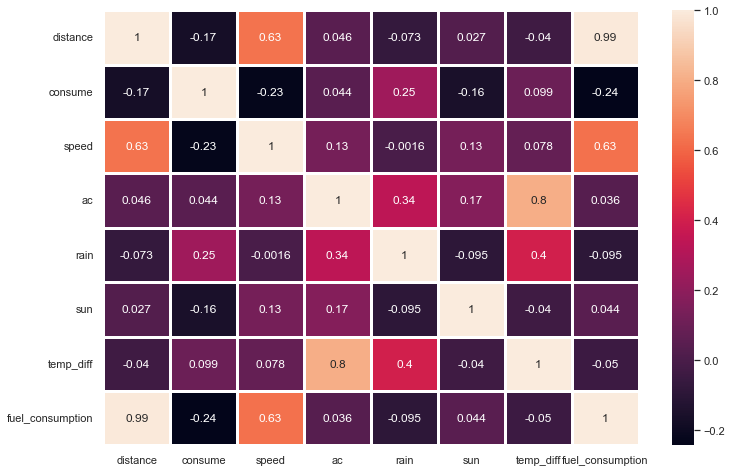

In [48]:
correlations_matrix = df_E10.corr()
sns.heatmap(correlations_matrix, sns.set(rc = {'figure.figsize':(12,8)}), linewidths=3, annot=True)
plt.show()

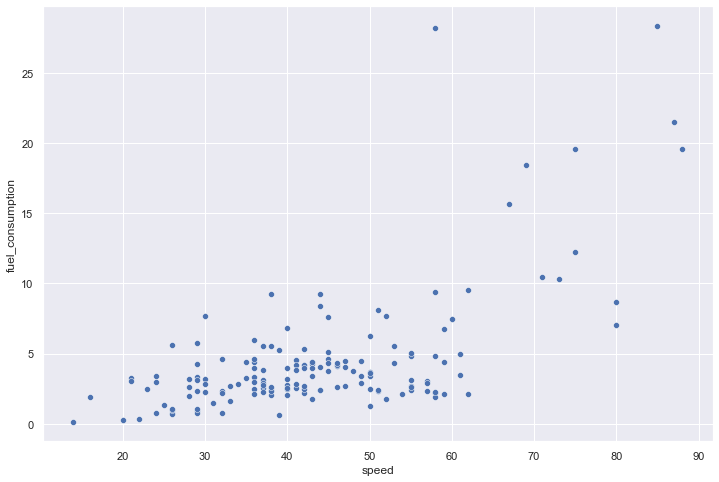

In [49]:
sns.scatterplot(x='speed',y='fuel_consumption',data=df_E10)
plt.show()


### Linear Regression

In [50]:
y_E10 = df_E10['fuel_consumption']
X_E10 = df_E10.drop(['fuel_consumption', 'distance', 'consume', 'gas_type'], axis=1)

In [51]:
from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different


transformer = MinMaxScaler().fit(X_E10)
x_normalized = transformer.transform(X_E10)
print(x_normalized.shape)
x_normalized=pd.DataFrame(x_normalized, columns=X_E10.columns)
x_normalized

(160, 5)


,speed,ac,rain,sun,temp_diff
0,0.554054,1.0,1.0,0.0,0.673469
1,0.202703,1.0,0.0,0.0,0.673469
2,0.635135,1.0,1.0,0.0,0.714286
3,0.513514,1.0,1.0,0.0,1.000000
4,1.000000,1.0,0.0,1.0,0.285714
...,...,...,...,...,...
155,0.378378,0.0,0.0,0.0,0.122449
156,0.378378,0.0,0.0,0.0,0.122449
157,0.351351,0.0,0.0,0.0,0.122449
158,0.283784,0.0,0.0,0.0,0.122449


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_normalized, y_E10, test_size=0.2, random_state=42)

In [53]:
from sklearn import linear_model
#we train/fit our model like yesterday
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [54]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.4194577566434018

In [55]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.3990369364119608

## For df_SP98

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


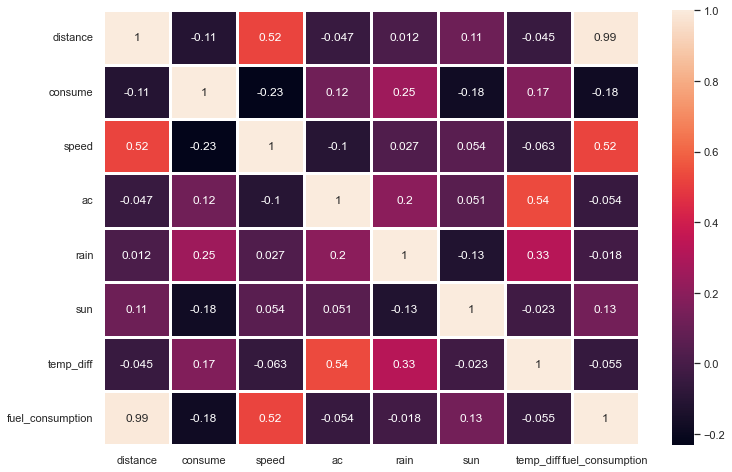

In [56]:
correlations_matrix = df_SP98.corr()
sns.heatmap(correlations_matrix, sns.set(rc = {'figure.figsize':(12,8)}), linewidths=3, annot=True)
plt.show()

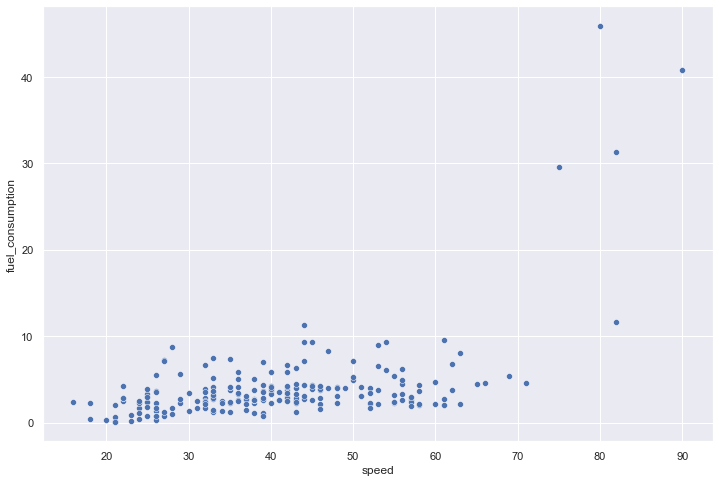

In [57]:
sns.scatterplot(x='speed',y='fuel_consumption',data=df_SP98)
plt.show()


### Linear Regression

In [58]:
y_SP98 = df_SP98['fuel_consumption']
X_SP98 = df_SP98.drop(['fuel_consumption', 'distance', 'consume', 'gas_type'], axis=1)

In [59]:
from sklearn.preprocessing import MinMaxScaler


transformer = MinMaxScaler().fit(X_SP98)
x_normalized = transformer.transform(X_SP98)
print(x_normalized.shape)
x_normalized=pd.DataFrame(x_normalized, columns=X_SP98.columns)
x_normalized

(228, 5)


,speed,ac,rain,sun,temp_diff
0,0.027027,1.0,1.0,0.0,0.725490
1,0.094595,1.0,1.0,0.0,0.725490
2,0.283784,1.0,0.0,0.0,0.921569
3,0.067568,1.0,1.0,0.0,0.666667
4,0.743243,1.0,1.0,0.0,0.745098
...,...,...,...,...,...
223,0.486486,0.0,0.0,0.0,0.274510
224,0.229730,0.0,0.0,1.0,0.274510
225,0.229730,0.0,0.0,1.0,0.274510
226,0.310811,0.0,0.0,0.0,0.274510


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_normalized, y_SP98, test_size=0.2, random_state=42)

In [61]:
from sklearn import linear_model
#we train/fit our model like yesterday
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [62]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.3076101058897578

In [66]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

-0.6143235487022343

# Conclusion

In [64]:
# This project concludes that the mean consumption of fuel for SP98 is similar to E10 

In [65]:
# However, the consumption rates for fuel E10 is more predictable than that of SP98 and so it could be better to choose E10